Decision Tree Accuracy: 98.06%


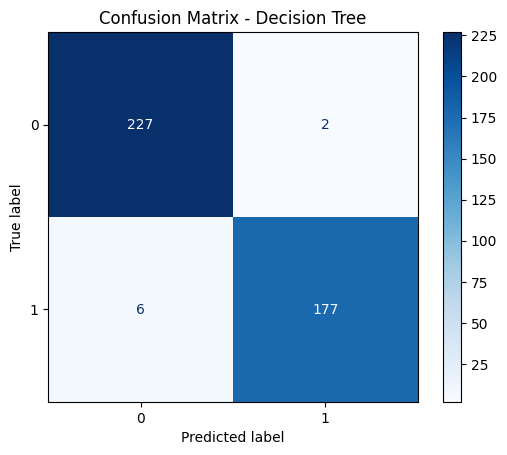

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv('bill_authentication.csv')

X = df.drop('Class', axis=1)
y = df['Class']               #(Target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

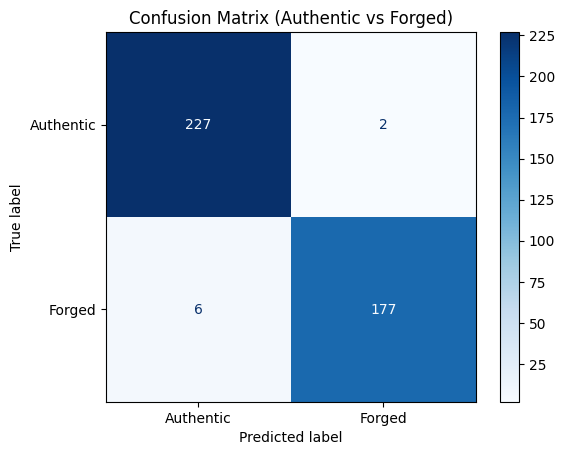

In [11]:
class_names = ['Authentic', 'Forged']

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Authentic vs Forged)")
plt.show()

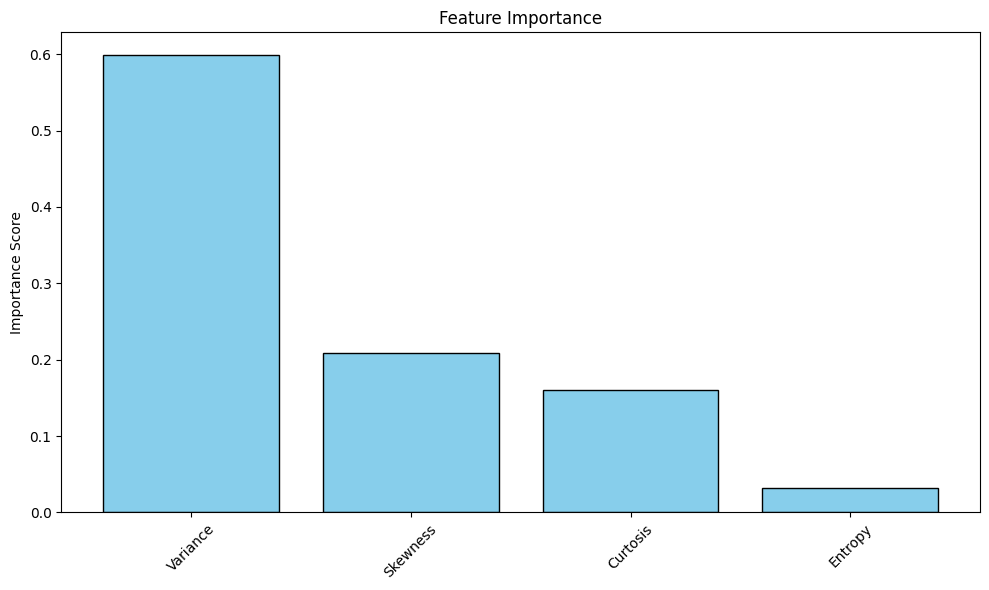

In [12]:
import numpy as np
import matplotlib.pyplot as plt


importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='skyblue', edgecolor='black')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

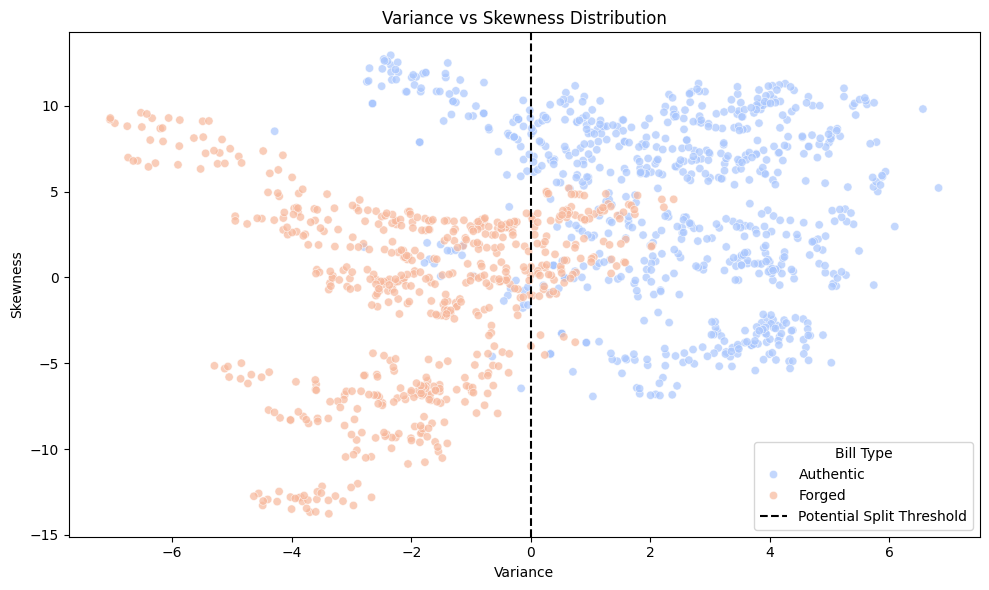

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bill_authentication.csv')

df['Class_Label'] = df['Class'].map({0: 'Authentic', 1: 'Forged'})

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Variance', y='Skewness', hue='Class_Label', palette='coolwarm', alpha=0.7)

plt.title("Variance vs Skewness Distribution")
plt.xlabel("Variance")
plt.ylabel("Skewness")

plt.axvline(x=0, color='black', linestyle='--', label="Potential Split Threshold")

plt.legend(title='Bill Type')

plt.tight_layout()
plt.savefig('variance_skewness_plot.png')
plt.show()

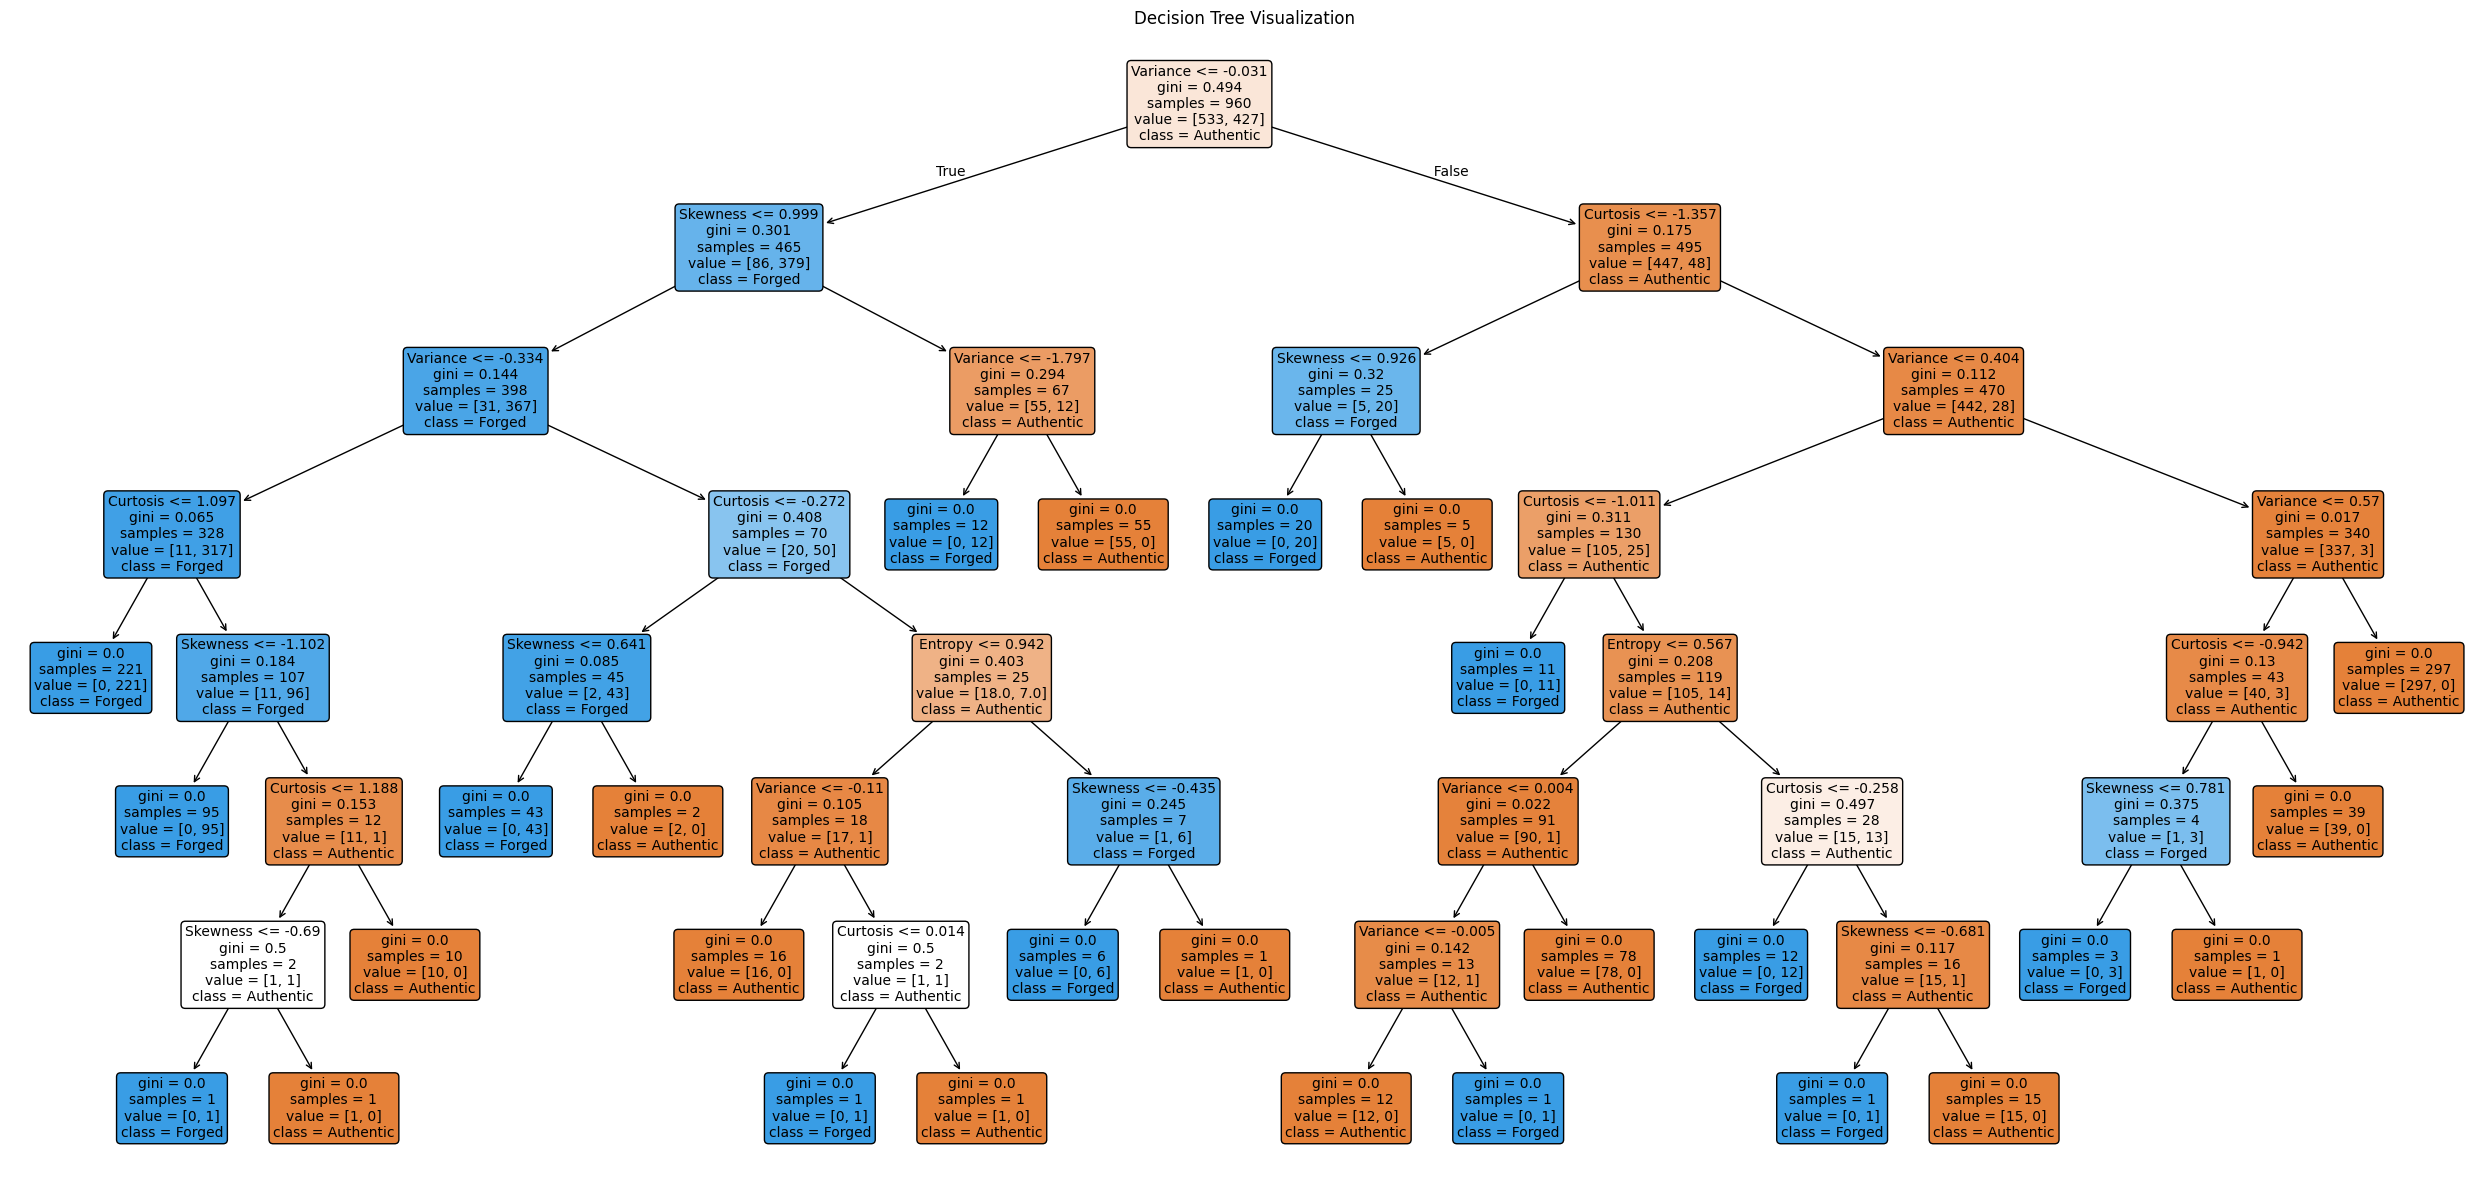

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 12))

plot_tree(clf,
          feature_names=X.columns,      # (Variance, Skewness vs.)
          class_names=['Authentic', 'Forged'], # Sınıf isimleri
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()


--- Detailed Classification Report ---
              precision    recall  f1-score   support

   Authentic       0.97      0.99      0.98       229
      Forged       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



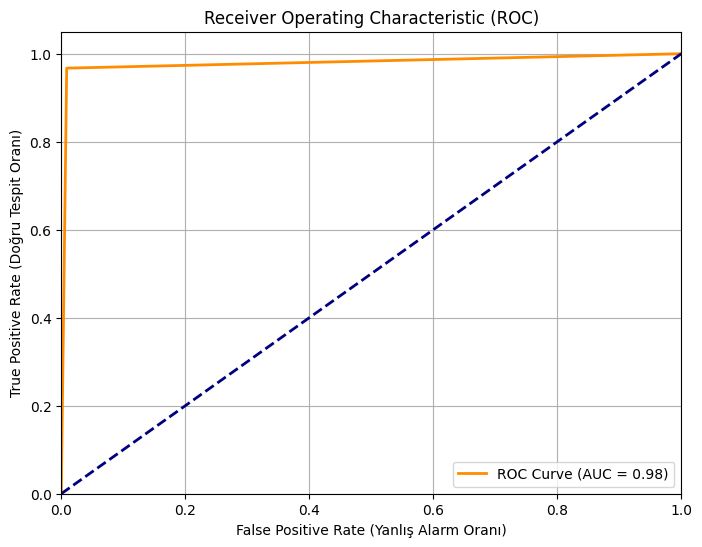

In [15]:
from sklearn.metrics import classification_report, roc_curve, auc


print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Authentic', 'Forged']))

y_prob = clf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)')
plt.ylabel('True Positive Rate (Doğru Tespit Oranı)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])


param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 3, 5, 10, 20],
    'clf__min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")

best_clf = grid_search.best_estimator_
best_acc = accuracy_score(y_test, best_clf.predict(X_test))
print(f"Test Set Accuracy with Best Parameters: {best_acc * 100:.2f}%")


--- Hyperparameter Tuning Results ---
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1}
Best Cross-Validation Accuracy: 98.44%
Test Set Accuracy with Best Parameters: 99.27%


Text(0.5, 1.0, 'Optimized Decision Tree Confusion Matrix\n(Accuracy: 99.27%)')

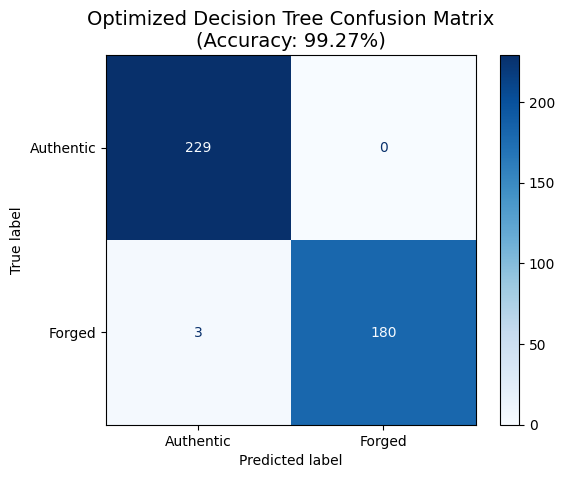

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred_optimized = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_optimized)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Authentic', 'Forged'])


disp.plot(values_format='d', cmap=plt.cm.Blues)


plt.title("Optimized Decision Tree Confusion Matrix\n(Accuracy: 99.27%)", fontsize=14)
